## An Introduction to Networks
_Bryan Graham_
_University of California at Berkeley_  
_April 2025_
<br>
<br>
#### Code citation:
<br>
Graham, Bryan S. (2025). "An Introduction to Networks and PageRank Python Jupyter Notebook," (Version 1.0) [Computer program]. Available at http://bryangraham.github.io/econometrics/ (Accessed 17 May 2025)
<br>
<br>

In [2]:
# Direct Python to plot all figures inline (i.e., not in a separate window)
%matplotlib inline

# Main scientific computing modules
import numpy as np
import scipy as sp
import pandas as pd

# Import matplotlib 
import matplotlib.pyplot as plt

# networkx module for the analysis of network data
import networkx as nx

#Hide FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Directory where data files are located
data     =  '/Users/bgraham/Dropbox/Teaching/Berkeley_Courses/MaCSS/Data/'
graphics = '/Users/bgraham/Dropbox/Teaching/Berkeley_Courses/MaCSS/Graphics/'

In [8]:
Nyakatoke = pd.read_csv(data+"NyakatokeEstimationSample.csv")
Nyakatoke[1:5]

## Creating a graph object using _networkx_
The _networkx_ package provides functionality for defining, exploring and, to a lesser extent, visualizing network data. The next snippet of code defines a graph object using the Nyakatoke data. First I add each household in Nyakatoke to the graph object as a node, second I use *Nyakatoke* dataframe to add edges or links where needed. Specifically, I use a Python list comprehension to quickly iterate through all dyads in the dataframe and add a link to the graph object as appropriate.

In [20]:
# create networkx graph object
G=nx.DiGraph()

# add households to graph object
hh_list = list(Nyakatoke['ego'].unique())
G.add_nodes_from(hh_list)

# create edge list and add to graph 
G.add_edges_from([(row['ego'], row['alter']) for index, row in Nyakatoke.iterrows() if \
                  (row['link']) ])

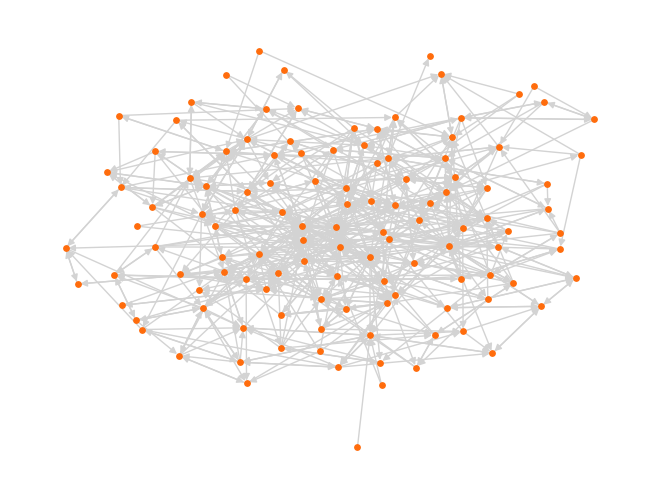

In [32]:
# Draw the graph
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, node_color='#FF6C0C', edge_color='lightgrey', width=1, node_size=15, font_size=15)

# Display the graph
plt.show()

Complementary Empirical CDF of Nyakatoke Degree Distribution
0     0.907563
1     0.848739
2     0.747899
3     0.613445
4     0.462185
5     0.378151
6     0.260504
7     0.201681
8     0.168067
9     0.117647
10    0.092437
11    0.084034
12    0.075630
13    0.067227
14    0.058824
15    0.050420
16    0.033613
18    0.025210
20    0.016807
22    0.008403
23    0.000000
dtype: float64


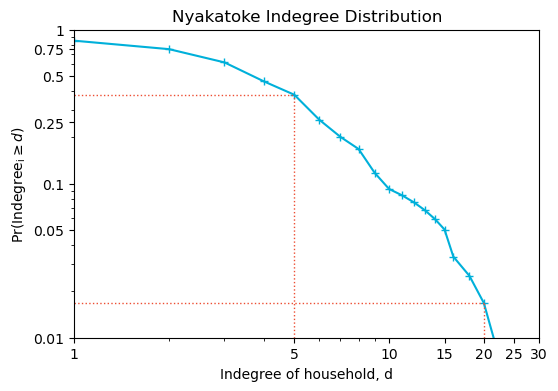

In [66]:
degree_sequence = pd.Series(sorted(dict(G.in_degree()).values(),reverse=True)) # In degree sequence of network as Pandas series
N               = len(degree_sequence)                                           # Number of households in the network

# Complementary Cumulative Distribution Function for agent degrees
CCDF_degree = 1 - degree_sequence.value_counts().sort_index().cumsum()/N

print("Complementary Empirical CDF of Nyakatoke Degree Distribution")
print(CCDF_degree)

# Plot Nyakatoke Degree Distribution
fig_nyakatoke_degree = plt.figure(figsize=(6,4))
ax = fig_nyakatoke_degree.add_subplot(1,1,1)

plt.loglog(CCDF_degree,'-', marker='+', color='#00B0DA')
plt.title("Nyakatoke Indegree Distribution")
plt.xlabel("Indegree of household, d")
plt.ylabel(r"$\Pr (\mathrm{Indegree_{i}} \geq d)$")

# Set axis limits and tick marks (log scale with tick labels in levels)
plt.ylim([1e-2,1])
plt.xlim([1, 30])

ax.set_yticks([1e-2, 0.05, 0.1 ,0.25, 0.50, 0.75, 1])
ax.set_yticklabels([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1])
ax.set_xticks([1, 5, 10, 15, 20, 25, 30])
ax.set_xticklabels([1, 5, 10, 15, 20, 25, 30])

# Annotate to show large number of low degree households coupled with a few hubs
plt.plot([5, 5], [0.01, CCDF_degree[5]], color='#ED4E33', linestyle=':', linewidth=1)
plt.plot([1, 5], [CCDF_degree[5], CCDF_degree[5]], color='#ED4E33', linestyle=':', linewidth=1)
plt.plot([20, 20], [0.01, CCDF_degree[20]], color='#ED4E33', linestyle=':', linewidth=1)
plt.plot([1, 20], [CCDF_degree[20], CCDF_degree[20]], color='#ED4E33', linestyle=':', linewidth=1)

_Networkx_ also includes functionality for calculating basic summary statistics for a network. The next code snipped calculates the density, transitivity, average degree, standard deviation of degree and fraction of nodes in the giant component.

In [73]:
print("Density                  : " + "%3.4f" % nx.density(G))                                                 # Density           
print("Transitivity             : " + "%3.4f" % nx.transitivity(G))                                            # Transitivity
print("Mean Degree              : " + "%3.4f" % np.mean(degree_sequence))                                      # Mean Degree
print("Std. Dev. Degree.        : " + "%3.4f" % np.std(degree_sequence))                                       # Std. of Degree
print("% in Giant Comp. (weak)  : " + "%2.1f" % (100*len(max(nx.weakly_connected_components(G), key=len))/N))  # Giant component (weak)
print("% in Giant Comp. (srong) : " + "%2.1f" % (100*len(max(nx.strongly_connected_components(G), key=len))/N))# Giant component (strong)

Density                  : 0.0449
Transitivity             : 0.1604
Mean Degree              : 5.2941
Std. Dev. Degree.        : 4.4859
% in Giant Comp. (weak)  : 100.0
% in Giant Comp. (srong) : 89.1


In [77]:
print("%s %s" % ('TRIAD'.ljust(10), 'COUNT'.rjust(15)))
print("--------------------------")
for triad, count in nx.triadic_census(G.to_directed()).items():
    print("%s %s" % (triad.ljust(10), '{:,d}'.format(count).rjust(15)))

TRIAD                COUNT
--------------------------
003                221,189
012                 34,413
102                 13,832
021D                   478
021U                   832
021C                   826
111D                   954
111U                   676
030T                    96
030C                     4
201                    304
120D                    54
120U                    47
120C                    30
210                     73
300                     11
